# Step1: preprocess data in #superbowl

In [2]:
import json
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt


file = 'tweet_data/tweets_#superbowl.txt'
titles = []
locations = [] # 1 for WA, -1 for MA
total_number = 0

def match(location):
    if ((re.match('.*WA.*', location) or re.match('.*Wash.*', location)) 
        and not re.match('.*DC.*', location) and not re.match('.*D\\.C\\..*', location)):
        return 1
    if (re.match('.*MA.*', location) or re.match('.*Mass.*', location)):
        return -1
    return 0

with open(file, 'r') as cur_file:
    for line in cur_file:
        total_number += 1
        data = json.loads(line)
        title = data['title']
        location = data['tweet']['user']['location']
        label = match(location)
        if (label != 0):
            locations.append(label)
            titles.append(title)

df = pd.DataFrame({
    'title' : titles,
    'location' : locations
}, columns = ['title', 'location'])
display(df)
df.to_csv('extracted_data/Q2.csv', index = False)

print ('total number of tweets: '+str(total_number))
print ('extracted titles: '+str(len(titles)))
print ('extracted locations: '+str(len(locations)))


,title,location
0,Our @ButchStearns talked #Patriots w/3X #Super...,-1
1,Interview With the Seattle Seahawks Superbowl ...,1
2,@jc_nogales Sunday February 1st. Se juega en A...,-1
3,@Deadspin Is it worse than #NFL with #Patriots...,-1
4,Interview With the Seattle Seahawks Superbowl ...,1
5,"@katyperry You have to play your ""Lose Your Lo...",-1
6,No offense Katy Perry but we hope this is a JO...,1
7,Seattle #Seahawks #LegionofBoom Youth Tee #Sup...,1
8,Seattle #Seahawks #LegionofBoom Youth Tee #Sup...,1
9,@JessicCarpenter thanks for the follow Go #Pat...,-1


total number of tweets: 1348767
extracted titles: 32931
extracted locations: 32931


# Step2: model text data (title)

In [6]:
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


# trim data
stemmer = SnowballStemmer("english")
def trim_and_stem(data_list):
    for i in range(len(data_list)):
        temp = re.findall('[a-zA-Z]+', data_list[i])
        ans = []
        for j in range(len(temp)):
            if not temp[j].isdigit():
                ans.append(stemmer.stem(temp[j])) # stem() turned words into lowercase            
        data_list[i] = " ".join(ans)

trim_and_stem(titles)

# generate count matrices with min_df = 2
count_vect = CountVectorizer(min_df=2, stop_words ='english')
X_counts = count_vect.fit_transform(titles)

# generate tfidf matrices 
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

print (X_tfidf.shape)

(32931, 10255)


# Step3: feature extraction with LSI

In [7]:
from sklearn.decomposition import TruncatedSVD

# extract feature using LSI
svd = TruncatedSVD(n_components = 100, n_iter = 10,random_state = 42)
lsi_res = svd.fit_transform(X_tfidf)

print (lsi_res.shape)


(32931, 100)


# Step4: split train and test dataset

In [19]:
from sklearn.cross_validation import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(lsi_res, locations, test_size=0.1, random_state=42)

print (len(x_train))
print (len(x_test))
print (len(y_train))
print (len(y_test))

print (x_train[:5])
print (y_test[:10])


29637
3294
29637
3294
[[  5.00330424e-02  -2.64336399e-02   3.61970068e-02  -3.36131194e-02
   -5.62605627e-02   5.66077498e-03   1.41880924e-02  -2.04943632e-02
    9.65378079e-03  -1.12434247e-02  -2.05204004e-03   1.35515043e-02
    6.84424281e-03   8.48555227e-03  -1.65453580e-02  -9.51826135e-03
   -3.58002175e-04   7.40289001e-03  -4.55043755e-03  -1.29696362e-02
   -1.85625426e-02   4.02192724e-03   7.45911495e-03  -1.17276496e-02
    2.09381351e-02  -4.67971408e-03  -1.59808506e-02   2.25684224e-02
    8.06044513e-03  -2.59032283e-02   5.94552896e-03   4.63758781e-02
   -1.14217683e-02   3.83927271e-02   1.33095217e-01  -6.81906770e-02
    1.66528962e-02  -5.21052599e-02   3.45715869e-02   1.34204137e-01
    5.02051930e-02  -1.20416313e-01  -8.86129302e-02  -3.59906557e-03
    3.45621967e-02  -5.36180225e-03  -4.38259405e-02  -1.99221434e-02
    3.52252982e-02   1.02951753e-03   1.61392504e-02  -6.96139154e-04
   -9.70774839e-02  -2.05184866e-02   1.09721244e-02  -2.41920889e-0

# Step5: plot ROC curve

In [20]:
from sklearn.metrics import roc_curve, auc

# draw roc curve
def plot_roc_curve(method, fpr, tpr, auc):
    plt.figure(figsize=(15,9))
    plt.plot(fpr, tpr, color='deeppink', lw=2, label='ROC curve (area = %0.3f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve ('+method+')', fontsize=23)
    plt.legend(loc="lower right")
    plt.show()

# Step6: plot confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix
import itertools

## confusion matrix
class_names = ['Washington', 'Massachusetts']
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.YlOrBr):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted Class', fontsize=12)
    plt.xlabel('Actual Class', fontsize=12)
    

# Step7: classification with SVM

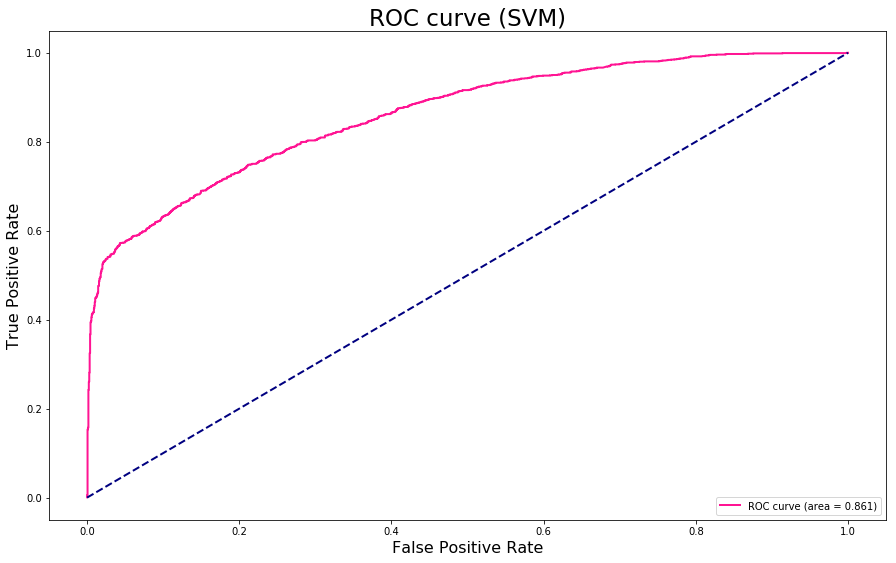

accuracy:
0.764420157863
precision:
0.959493670886
recall:
0.50466045273
confusion matrix:
[[1760   32]
 [ 744  758]]


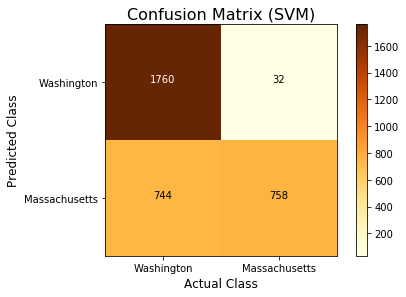

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import svm


parameters = {'gamma':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
svm_classifier = svm.SVC(probability=True)
svm_search = GridSearchCV(svm_classifier, parameters, cv=5)
svm_classifier.fit(x_train, y_train)
svm_label_true, svm_label_predicted = y_test, svm_classifier.predict(x_test)
svm_label_score_predicted = svm_classifier.decision_function(x_test) # use decisioin_function to get better curve

# plot ROC curve
svm_fpr, svm_tpr, svm_thresholds = roc_curve(svm_label_true, svm_label_score_predicted)
svm_roc_auc = auc(svm_fpr, svm_tpr)
plot_roc_curve('SVM', svm_fpr, svm_tpr, svm_roc_auc)

accuracy = []
precision = []
recall = []

# calculate accuracy, recall and precision
svm_acc = metrics.accuracy_score(svm_label_true, svm_label_predicted)
accuracy.append(svm_acc)
print ("accuracy:")
print (svm_acc)
svm_pre = metrics.precision_score(svm_label_true, svm_label_predicted)
precision.append(svm_pre)
print ("precision:")
print (svm_pre)
svm_recall = metrics.recall_score(svm_label_true, svm_label_predicted)
recall.append(svm_recall)
print ("recall:")
print (svm_recall)

# calculate and plot non-normalized confusion matrix
print ("confusion matrix:")
svm_conf_mat = metrics.confusion_matrix(svm_label_true, svm_label_predicted)
print (svm_conf_mat)
plt.figure()
title = 'Confusion Matrix (SVM)'
plot_confusion_matrix(svm_conf_mat, classes=class_names, title=title)
plt.show()



# Step8: classification with Naive Bayes Algorithms

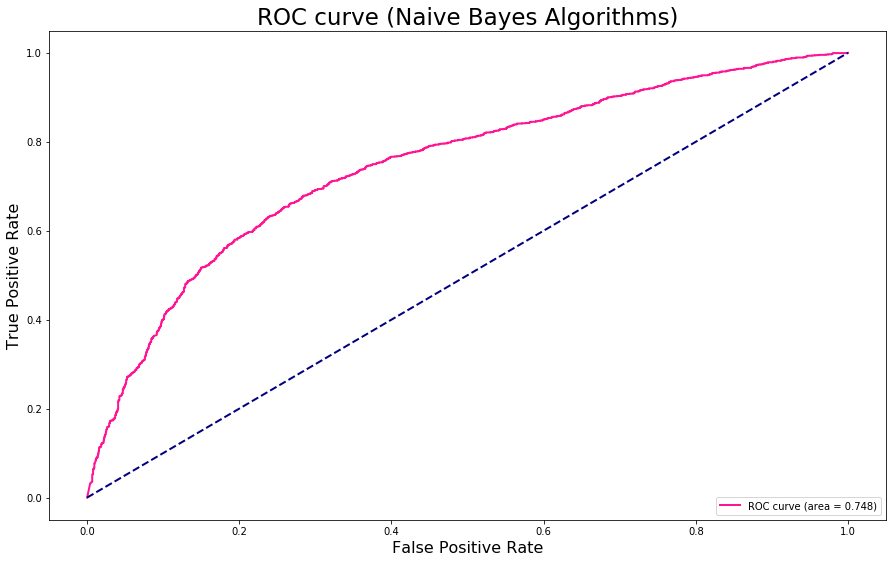

accuracy:
0.679720704311
precision:
0.623276337562
recall:
0.752330226365
confusion matrix:
[[1109  683]
 [ 372 1130]]


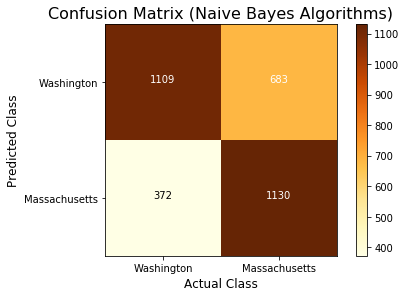

In [25]:
from sklearn.naive_bayes import GaussianNB


#Use Gaussian Naive Bayes method
bayes_classifier = GaussianNB()
#Fit the model
bayes_classifier.fit(x_train, y_train)

#Calculate the result & accuracy
result = bayes_classifier.predict(x_test)
bayes_accuracy = bayes_classifier.score(x_test, y_test)
accuracy.append(bayes_accuracy)

#Calculate the probability estimates of the positive class
prob_data = bayes_classifier.predict_proba(x_test)
prob_data = prob_data[:,1]

#Calculate fpr & ftr, plot ROC curve
bayes_fpr, bayes_tpr, bayes_thresholds = metrics.roc_curve(y_test, prob_data)
bayes_roc_auc = auc(bayes_fpr, bayes_tpr)
plot_roc_curve('Naive Bayes Algorithms', bayes_fpr, bayes_tpr, bayes_roc_auc)

#Calculate confusion matrix, precision & recall
bayes_conf_mat = metrics.confusion_matrix(y_test, result)
bayes_precision = metrics.precision_score(y_test, result)
precision.append(bayes_precision)
bayes_recall = metrics.recall_score(y_test, result)
recall.append(bayes_recall)
bayes_roc_auc = metrics.auc(bayes_fpr, bayes_tpr)

# print accuracy, recall and precision
print ("accuracy:")
print (bayes_accuracy)

print ("precision:")
print (bayes_precision)

print ("recall:")
print (bayes_recall)

# calculate and plot non-normalized confusion matrix
print ("confusion matrix:")
print (bayes_conf_mat)
plt.figure()
title = 'Confusion Matrix (Naive Bayes Algorithms)'
plot_confusion_matrix(bayes_conf_mat, classes=class_names, title=title)
plt.show()



# Step9: classification with Logistic Regression

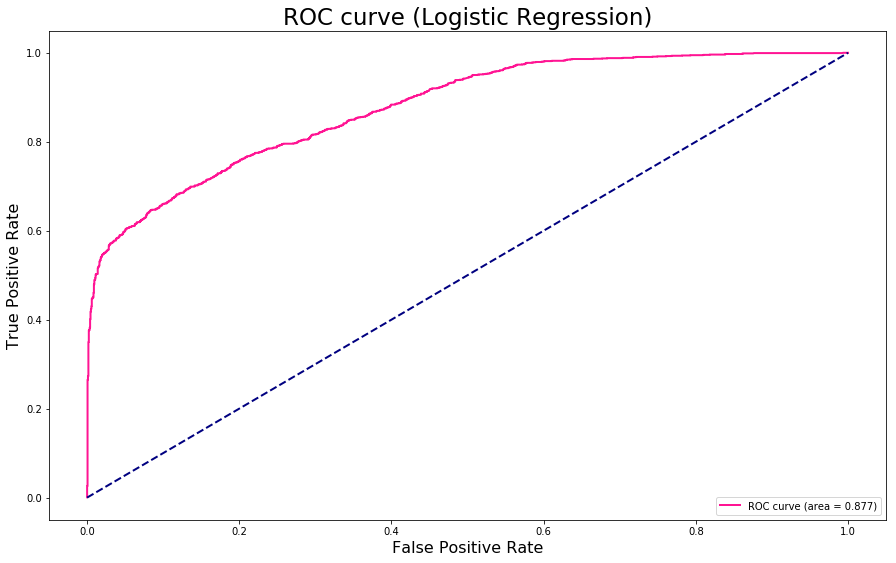

accuracy:
0.791742562234
precision:
0.907185628743
recall:
0.605193075899
confusion matrix:
[[1699   93]
 [ 593  909]]


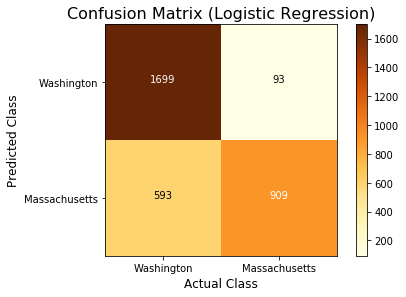

In [27]:
from sklearn import linear_model

log_classifier = linear_model.LogisticRegression() # using default parameters
log_classifier.fit(x_train, y_train)

log_label_true = y_test;
log_label_predicted = log_classifier.predict(x_test)

# plot ROC curve
log_fpr, log_tpr, log_thresholds = metrics.roc_curve(y_test, log_classifier.predict_proba(x_test)[:, 1])
log_roc_auc = auc(log_fpr, log_tpr)
plot_roc_curve('Logistic Regression', log_fpr, log_tpr, log_roc_auc)

# calculate accuracy, recall and precision
log_acc = metrics.accuracy_score(log_label_true, log_label_predicted)
accuracy.append(log_acc)
print ("accuracy:")
print (log_acc)
log_pre = metrics.precision_score(log_label_true, log_label_predicted)
precision.append(log_pre)
print ("precision:")
print (log_pre)
log_recall = metrics.recall_score(log_label_true, log_label_predicted)
recall.append(log_recall)
print ("recall:")
print (log_recall)

# calculate and plot non-normalized confusion matrix
print ("confusion matrix:")
log_conf_mat = metrics.confusion_matrix(log_label_true, log_label_predicted)
print (log_conf_mat)
plt.figure()
title = 'Confusion Matrix (Logistic Regression)'
plot_confusion_matrix(log_conf_mat, classes=class_names, title=title)
plt.show()


# Step 10: compare three methods

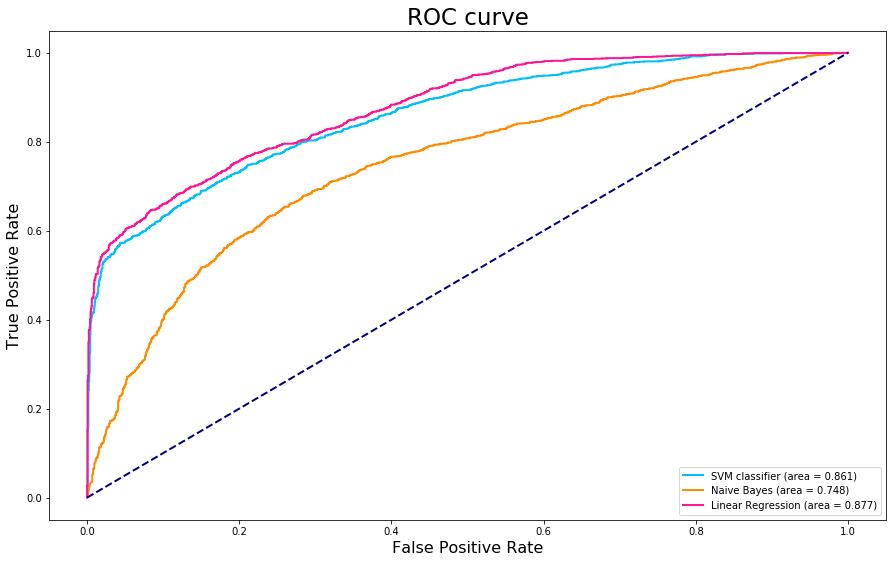

,classifier,accuracy,precision,recall
0,SVM,0.764420,0.959494,0.504660
1,Naive Bayes Algorithms,0.679721,0.623276,0.752330
2,Logistic Regression,0.791743,0.907186,0.605193


In [30]:
# compare ROC curve
plt.figure(figsize=(15,9))
plt.plot(svm_fpr, svm_tpr, color='deepskyblue', lw=2, label='SVM classifier (area = %0.3f)' % svm_roc_auc)
plt.plot(bayes_fpr, bayes_tpr, color='darkorange', lw=2, label='Naive Bayes (area = %0.3f)' % bayes_roc_auc)
plt.plot(log_fpr, log_tpr, color='deeppink', lw=2, label='Linear Regression (area = %0.3f)' % log_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=23)
plt.legend(loc="lower right")
plt.show()

# compare accuracy, precision and recall
df = pd.DataFrame({
    'classifier' : ['SVM', 'Naive Bayes Algorithms', 'Logistic Regression'],
    'accuracy' : accuracy,
    'precision' : precision,
    'recall' : recall
}, columns = ['classifier', 'accuracy', 'precision', 'recall'])
display(df)
